# Credit Defaulted - Random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
credit_card_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/3a1a166e-3ee4-47ee-bc4c-d9dda21601e2/credit-card-default.csv')
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
print(credit_card_data.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [11]:
credit_card_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [18]:
x = credit_card_data.drop(columns=['defaulted'], axis=1)
y = credit_card_data['defaulted']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Note: Data is already clean & now lets try to build a model
### Model Building:

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators

In [19]:
rf_model = RandomForestClassifier()

In [20]:
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.61      0.33      0.43      1942

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.73      0.63      0.66      9000
weighted avg       0.79      0.81      0.79      9000



In [23]:
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

0.8104444444444444
[[6661  397]
 [1309  633]]


### Hyper parameter tuning - GridSearchCV

#####  Hyper parameters to tune: max_depth, min_samples_leaf, min_samples_split, max_features, n_estimators

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [26]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [31]:
# ===> Hyper parameters

folds = KFold(n_splits=5, shuffle=True, random_state=101)
params = {  'max_depth': [3, 4, 5, 6, 7, 8]  }
grid_cv1 = GridSearchCV(rf_model, param_grid=params, scoring='accuracy', n_jobs = -1, cv=folds, verbose=1, return_train_score=True)
grid_cv1.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [33]:
_result = pd.DataFrame(grid_cv1.cv_results_)
_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155591,0.012708,0.008760,0.001680,3,{'max_depth': 3},0.805000,0.804762,0.813571,0.804048,...,0.806286,0.003663,6,0.805833,0.808095,0.810357,0.809048,0.800714,0.806810,0.003387
1,0.158683,0.004683,0.005481,0.001066,4,{'max_depth': 4},0.815000,0.802619,0.811905,0.808333,...,0.811952,0.006458,4,0.813393,0.807619,0.811429,0.814405,0.818274,0.813024,0.003503
2,0.196276,0.005530,0.007076,0.000698,5,{'max_depth': 5},0.814524,0.810238,0.816667,0.815952,...,0.813571,0.002715,3,0.817798,0.815060,0.823810,0.822381,0.812440,0.818298,0.004292
3,0.219155,0.005626,0.007567,0.000979,6,{'max_depth': 6},0.810714,0.807381,0.819286,0.808333,...,0.811286,0.004210,5,0.817202,0.822440,0.826369,0.822202,0.821726,0.821988,0.002913
4,0.249175,0.012852,0.008770,0.001835,7,{'max_depth': 7},0.814524,0.808571,0.816429,0.814762,...,0.815286,0.004342,1,0.824345,0.832798,0.826726,0.830357,0.830119,0.828869,0.002975
5,0.253156,0.036596,0.006766,0.001403,8,{'max_depth': 8},0.815476,0.807857,0.815714,0.814762,...,0.815000,0.004246,2,0.840893,0.840298,0.837857,0.839821,0.840179,0.839810,0.001035


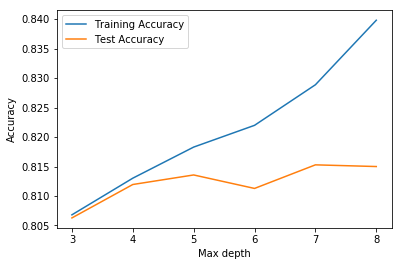

In [34]:
plt.figure()
plt.plot(_result['param_max_depth'], _result['mean_train_score'], label='Training Accuracy')
plt.plot(_result['param_max_depth'], _result['mean_test_score'], label='Test Accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

Note: Training & Test accuracy is drastically decreased after 4th level.

#### min_samples_split: 

In [36]:
folds = KFold(n_splits=5, random_state=True, shuffle=True)
params = {'min_samples_split': range(5, 300, 30)}
gs_model2 = GridSearchCV(rf_model,
             param_grid=params,
             scoring='accuracy',
             n_jobs=-1,
             cv=folds,
             verbose=1,
             return_train_score=True)
gs_model2.fit(x_train, y_train)
results = pd.DataFrame(gs_model2.cv_results_)
results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.3s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.722993,0.015174,0.021888,0.004387,5,{'min_samples_split': 5},0.806905,0.807619,0.804524,0.792381,...,0.802857,0.005506,10,0.963512,0.962619,0.964107,0.963929,0.962976,0.963429,0.000562
1,0.642912,0.027499,0.016130,0.006063,35,{'min_samples_split': 35},0.817143,0.818095,0.817381,0.809524,...,0.814619,0.003619,8,0.857202,0.857857,0.857024,0.863155,0.859048,0.858857,0.002263
2,0.546089,0.043298,0.011510,0.001798,65,{'min_samples_split': 65},0.815476,0.817143,0.818571,0.807381,...,0.814429,0.003900,9,0.841786,0.839524,0.839940,0.844107,0.843750,0.841821,0.001885
3,0.565662,0.058323,0.014866,0.003724,95,{'min_samples_split': 95},0.820476,0.816667,0.822143,0.806190,...,0.815905,0.005625,6,0.831726,0.831726,0.833810,0.833571,0.834107,0.832988,0.001044
4,0.612696,0.099335,0.012795,0.002544,125,{'min_samples_split': 125},0.820714,0.821667,0.819524,0.806667,...,0.816571,0.005571,3,0.827500,0.829583,0.826667,0.828929,0.830476,0.828631,0.001381
5,0.459934,0.011711,0.011049,0.002712,155,{'min_samples_split': 155},0.820952,0.819286,0.821905,0.805238,...,0.816286,0.006155,5,0.826310,0.824821,0.824167,0.828512,0.828869,0.826536,0.001895
6,0.422790,0.009993,0.010409,0.000465,185,{'min_samples_split': 185},0.819524,0.822143,0.823571,0.806667,...,0.816810,0.006422,2,0.823512,0.823214,0.824167,0.827500,0.824524,0.824583,0.001530
7,0.417694,0.023922,0.009476,0.000739,215,{'min_samples_split': 215},0.821190,0.817857,0.821667,0.806667,...,0.816476,0.005468,4,0.822321,0.822143,0.822917,0.825536,0.822798,0.823143,0.001231
8,0.414111,0.012632,0.008828,0.000695,245,{'min_samples_split': 245},0.822857,0.820714,0.820476,0.807381,...,0.817619,0.005494,1,0.821905,0.821845,0.821012,0.826310,0.823095,0.822833,0.001861
9,0.358730,0.050037,0.007232,0.000942,275,{'min_samples_split': 275},0.820238,0.812619,0.821190,0.806905,...,0.815333,0.005233,7,0.821190,0.816548,0.822857,0.823274,0.822619,0.821298,0.002476


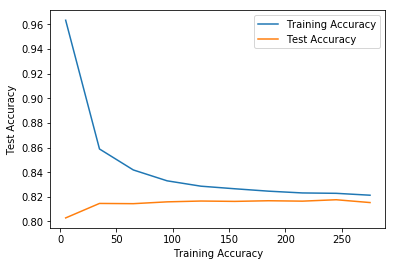

In [39]:
plt.figure()
plt.plot(results['param_min_samples_split'], results['mean_train_score'], label='Training Accuracy')
plt.plot(results['param_min_samples_split'], results['mean_test_score'], label='Test Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Test Accuracy')
plt.legend(loc='upper right')
plt.show()

#### min_samples_leaf:

In [46]:
folds = KFold(n_splits=5, random_state=True, shuffle=True)
params = {'min_samples_leaf': range(5, 500, 10)}
gs_model3 = GridSearchCV(rf_model,
                         param_grid=params,
                         cv=folds,
                         verbose=1,
                         n_jobs=-1,
                         return_train_score=True,
                         scoring='accuracy')
gs_model3.fit(x_train, y_train)
results = pd.DataFrame(gs_model3.cv_results_)
results

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.850318,0.030533,0.029697,0.012241,5,{'min_samples_leaf': 5},0.812619,0.814286,0.819524,0.802857,...,0.811571,0.005597,15,0.882738,0.876786,0.877679,0.885000,0.880952,0.880631,0.003070
1,0.741400,0.033856,0.016912,0.002187,15,{'min_samples_leaf': 15},0.822143,0.813810,0.817381,0.807381,...,0.814143,0.005244,7,0.837500,0.837976,0.836667,0.839286,0.839940,0.838274,0.001189
2,0.661315,0.053633,0.024240,0.012289,25,{'min_samples_leaf': 25},0.823095,0.818810,0.820952,0.803333,...,0.816143,0.007004,1,0.828274,0.828631,0.827143,0.828571,0.828095,0.828143,0.000537
3,0.882173,0.137755,0.025032,0.008145,35,{'min_samples_leaf': 35},0.817381,0.814048,0.819524,0.803571,...,0.813667,0.005481,8,0.822976,0.823631,0.821845,0.824881,0.824940,0.823655,0.001174
4,0.759617,0.011364,0.022607,0.015081,45,{'min_samples_leaf': 45},0.821667,0.822143,0.819048,0.805714,...,0.814762,0.007656,3,0.822083,0.822976,0.819167,0.825060,0.818750,0.821607,0.002372
5,0.711624,0.042608,0.025454,0.020554,55,{'min_samples_leaf': 55},0.819762,0.817381,0.815952,0.806905,...,0.814619,0.004420,4,0.818571,0.817321,0.818571,0.823631,0.820000,0.819619,0.002178
6,0.636590,0.061422,0.017092,0.005879,65,{'min_samples_leaf': 65},0.824048,0.821905,0.816905,0.804524,...,0.815571,0.007235,2,0.819464,0.818690,0.819702,0.821429,0.817560,0.819369,0.001273
7,0.671771,0.009747,0.015246,0.006180,75,{'min_samples_leaf': 75},0.816190,0.810238,0.814762,0.804524,...,0.812000,0.004229,13,0.815952,0.811786,0.812917,0.822798,0.816369,0.815964,0.003837
8,0.535954,0.040615,0.011929,0.002650,85,{'min_samples_leaf': 85},0.822381,0.814048,0.817381,0.801429,...,0.814381,0.007016,5,0.818155,0.814643,0.818036,0.821488,0.818929,0.818250,0.002191
9,0.608047,0.113141,0.016386,0.008319,95,{'min_samples_leaf': 95},0.817143,0.812143,0.819286,0.801905,...,0.812714,0.006002,12,0.812976,0.814643,0.818690,0.818095,0.817500,0.816381,0.002197


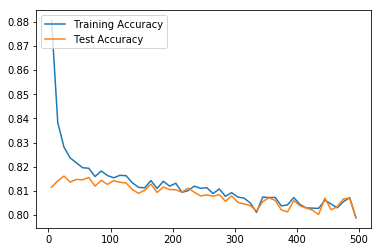

In [48]:
plt.figure()
plt.plot(results['param_min_samples_leaf'], results['mean_train_score'], label='Training Accuracy')
plt.plot(results['param_min_samples_leaf'], results['mean_test_score'], label='Test Accuracy')
plt.legend(loc='upper left')
plt.show()

In [49]:
gs_model3.best_params_

{'min_samples_leaf': 25}

#### n_estimators: No.of Decision tree estimators

In [50]:
folds = KFold(n_splits=5, random_state=True, shuffle=True)
params = {'n_estimators': range(10, 500, 50)}
gs_model4 = GridSearchCV(rf_model,
                         param_grid=params,
                         verbose=1,
                         n_jobs=-1,
                         scoring='accuracy',
                         return_train_score=True,
                         cv=folds)
gs_model4.fit(x_train, y_train)
results = pd.DataFrame(gs_model4.cv_results_)
results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.758304,0.025961,0.017520,0.002359,10,{'n_estimators': 10},0.811190,0.812381,0.809286,0.796905,...,0.805381,0.006895,10,0.983214,0.980238,0.981190,0.979881,0.981845,0.981274,0.001193
1,4.154241,0.052103,0.098786,0.007423,60,{'n_estimators': 60},0.816429,0.817619,0.818571,0.805238,...,0.813714,0.005041,9,0.999762,0.999762,0.999821,0.999643,0.999821,0.999762,0.000065
2,8.028417,0.321965,0.166605,0.013612,110,{'n_estimators': 110},0.816905,0.814524,0.821429,0.807857,...,0.814048,0.004933,8,0.999940,1.000000,0.999940,1.000000,1.000000,0.999976,0.000029
3,12.079311,0.135134,0.283682,0.018875,160,{'n_estimators': 160},0.820476,0.817619,0.819762,0.810476,...,0.815667,0.004534,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.985192,0.134829,0.349729,0.031642,210,{'n_estimators': 210},0.817619,0.816429,0.821429,0.807857,...,0.814333,0.005357,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,20.445204,1.077968,0.536043,0.189893,260,{'n_estimators': 260},0.819762,0.814286,0.820238,0.808810,...,0.814667,0.004713,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,32.896848,2.829920,0.887491,0.354063,310,{'n_estimators': 310},0.817381,0.815476,0.820476,0.811429,...,0.815238,0.003496,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,28.062704,2.014034,0.564701,0.048070,360,{'n_estimators': 360},0.823095,0.814524,0.819762,0.808571,...,0.815190,0.005560,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,28.291890,0.167734,0.613662,0.046277,410,{'n_estimators': 410},0.818333,0.814286,0.822619,0.806667,...,0.814190,0.005853,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,29.032591,3.277920,0.551056,0.121769,460,{'n_estimators': 460},0.818810,0.815476,0.821667,0.807857,...,0.814429,0.005532,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


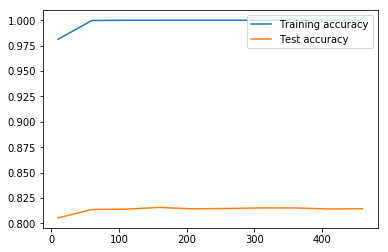

In [52]:
plt.figure()
plt.plot(results['param_n_estimators'], results['mean_train_score'], label='Training accuracy')
plt.plot(results['param_n_estimators'], results['mean_test_score'], label='Test accuracy')
plt.legend(loc='upper right')
plt.show()

In [60]:
list(x_train.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [61]:
folds = KFold(n_splits=5, random_state=True, shuffle=True)
params = {'max_features': range(1, 15)}
gs_model4 = GridSearchCV(rf_model,
                         param_grid=params,
                         verbose=1,
                         n_jobs=-1,
                         scoring='accuracy',
                         return_train_score=True,
                         cv=folds)
gs_model4.fit(x_train, y_train)
results = pd.DataFrame(gs_model4.cv_results_)
results

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   58.5s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.289858,0.018863,0.022023,0.002231,1,{'max_features': 1},0.801667,0.802619,0.806190,0.790476,...,0.798952,0.005857,14,0.980476,0.979702,0.981190,0.980833,0.982143,0.980869,0.000805
1,0.394891,0.013276,0.024182,0.009047,2,{'max_features': 2},0.803810,0.803333,0.800476,0.793810,...,0.799810,0.003733,13,0.981548,0.979405,0.980119,0.979702,0.979524,0.980060,0.000782
2,0.546582,0.009912,0.017375,0.000865,3,{'max_features': 3},0.802857,0.807381,0.807619,0.800952,...,0.802524,0.005061,12,0.980238,0.982143,0.978988,0.980417,0.980655,0.980488,0.001008
3,0.699520,0.023151,0.021931,0.007625,4,{'max_features': 4},0.809286,0.805952,0.812143,0.798333,...,0.804381,0.006171,5,0.980476,0.978988,0.979821,0.981905,0.982738,0.980786,0.001365
4,0.810892,0.027783,0.018694,0.003651,5,{'max_features': 5},0.812619,0.801667,0.806429,0.797381,...,0.803238,0.005682,9,0.980000,0.979464,0.979524,0.981548,0.981369,0.980381,0.000901
5,0.952415,0.032455,0.015944,0.001018,6,{'max_features': 6},0.809286,0.806905,0.808095,0.795952,...,0.804476,0.004904,4,0.978810,0.979702,0.980893,0.982560,0.981607,0.980714,0.001333
6,1.077383,0.042439,0.018579,0.006100,7,{'max_features': 7},0.812619,0.805000,0.811190,0.795476,...,0.805571,0.006123,2,0.980357,0.980536,0.980655,0.981190,0.980179,0.980583,0.000344
7,1.239989,0.038130,0.016348,0.002116,8,{'max_features': 8},0.810952,0.805714,0.807381,0.799286,...,0.803905,0.005401,7,0.981310,0.980238,0.979881,0.979940,0.979345,0.980143,0.000651
8,1.383680,0.024862,0.014935,0.001299,9,{'max_features': 9},0.810476,0.805952,0.805000,0.798571,...,0.804190,0.004131,6,0.980238,0.979345,0.979286,0.981786,0.978750,0.979881,0.001065
9,1.638842,0.045852,0.018166,0.003088,10,{'max_features': 10},0.810476,0.806429,0.809762,0.795714,...,0.803143,0.007208,10,0.981131,0.980595,0.980000,0.981131,0.979821,0.980536,0.000549


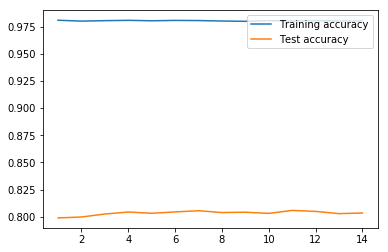

In [63]:
plt.figure()
plt.plot(results['param_max_features'], results['mean_train_score'], label='Training accuracy')
plt.plot(results['param_max_features'], results['mean_test_score'], label='Test accuracy')
plt.legend(loc='upper right')
plt.show()

#### Hyper parameter with including all:

In [64]:
folds = KFold(n_splits=5, random_state=True, shuffle=True)
params = {
    'max_features': range(4, 10),
    'n_estimators': range(20, 80, 20),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(50, 150, 25),
    'max_depth': [3, 4, 5]
}
gs_model4 = GridSearchCV(rf_model,
                         param_grid=params,
                         verbose=1,
                         n_jobs=-1,
                         scoring='accuracy',
                         return_train_score=True,
                         cv=folds)
gs_model4.fit(x_train, y_train)
results = pd.DataFrame(gs_model4.cv_results_)
results

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 15.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.335103,0.031292,0.011953,0.001996,3,4,100,50,20,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.804952,0.007054,422,0.804583,0.803155,0.805714,0.808512,0.805298,0.805452,0.001760
1,0.552301,0.015293,0.019304,0.002747,3,4,100,50,40,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.805095,0.008879,420,0.805536,0.804762,0.807321,0.809702,0.804643,0.806393,0.001912
2,0.856315,0.029375,0.028433,0.002098,3,4,100,50,60,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.805857,0.006168,412,0.802500,0.806488,0.805536,0.813393,0.806726,0.806929,0.003566
3,0.295781,0.024103,0.012164,0.002516,3,4,100,75,20,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.807810,0.007925,375,0.804940,0.809643,0.811190,0.809524,0.809940,0.809048,0.002137
4,0.635249,0.040867,0.018576,0.002320,3,4,100,75,40,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.807000,0.007958,390,0.807798,0.809345,0.806190,0.808452,0.808690,0.808095,0.001073
5,0.963374,0.075161,0.048753,0.012233,3,4,100,75,60,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.807571,0.006379,379,0.804643,0.805714,0.810893,0.811607,0.807798,0.808131,0.002751
6,0.362452,0.023946,0.012026,0.002287,3,4,100,100,20,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.806857,0.008062,392,0.809345,0.808988,0.805833,0.809345,0.807202,0.808143,0.001402
7,0.728958,0.044047,0.044232,0.021359,3,4,100,100,40,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.806286,0.007529,402,0.803929,0.808750,0.804821,0.807976,0.807679,0.806631,0.001896
8,0.978153,0.059971,0.031262,0.004818,3,4,100,100,60,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.806190,0.007109,403,0.804643,0.807143,0.806131,0.810179,0.806190,0.806857,0.001843
9,0.301345,0.017172,0.011562,0.001811,3,4,100,125,20,"{'max_depth': 3, 'max_features': 4, 'min_sampl...",...,0.804667,0.006522,426,0.803452,0.808631,0.802500,0.812560,0.809524,0.807333,0.003800


In [65]:
gs_model4.best_params_

{'max_depth': 4,
 'max_features': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 60}

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=60)
rfc.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
predictions = rfc.predict(x_test)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [69]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8104444444444444

In [79]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.34      0.46      1942

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [81]:
print(confusion_matrix(y_test,predictions))

[[6774  284]
 [1274  668]]


In [82]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.8104444444444444

In [ ]:
import fancyimpute